# Housing - exploratory data analysis (EDA)

NYC housing dataset b/w in 2012-13, seperated by boroughs

- [x] get an intuitive understanding, 
- [x] clear data
- [x] adjust columns data types
- [x] adjust columns
- [x] enrich
- [x] outlier and missing values
- [x] visualize for yourself
- [ ] visualize for client
- [ ] make cross comparisons
- [x] then **create an OUTPUT file for other models**

##### Notes
- **raw_data** is readed file w/ proper types and formats
- **data**, contains after missing values (sale_price) and necessary columns eliminated

### possible deletion columns: 
   - borough, building_class_category .. (extracted into diff. columns)
   - block, lot (nonsense)
   - easement (%100 empty), 
   - apartment_number (%74 empty)
   - 50% of estates has 0 land_square_feet
   - 50% of estates has 0 gross_square_feet
   - **30% of sale_price is 0 (28K+)**

### domain knowledge 
  - building_class_at_present: may be mapped into 3 groups to use later ?
  - building_class_at_present vs building_class_at_sale change has any meaning?
  - tax_class_at_present vs tax_class_at_sale has any meaning? (1, 2 and 4 is dominating values)
  - 10019 zipcode is %7 of houses, and 70K houses are located in of 100 zipcodes
  - 50% of estates has 0 land_square_feet and gross_square_feet. can be groupped into less categories?
  - 4000+ diff. apartment_number in 85K rows.
  - residential_units (165 types), %50 is 0 and 1 (40K+ rows) and 30K+ NaN. can be grouped into less categories?
  - commercial_units (23 types), 0 has 20K+, NaN is 60K+
  - can residential_units and commercial_units be used meaningful dummy column?
  - total_units (171 types), 1 (25K+, 0 (16K+), 2 (8K+) and NaN is 30K
     - total = residental + commercial ?
     - if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
     - if total = 0 , what we should do?
  - top 50 neighborhood covers 50K+ houses

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 250)


In [11]:
# read all datasets w/ dates

raw_data = pd.read_csv('dataset/housing/rollingsales_manhattan.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_bronx = pd.read_csv('dataset/housing/rollingsales_bronx.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_brooklyn = pd.read_csv('dataset/housing/rollingsales_brooklyn.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_queens = pd.read_csv('dataset/housing/rollingsales_queens.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_statenisland = pd.read_csv('dataset/housing/rollingsales_statenisland.csv', parse_dates=['SALE DATE'],  infer_datetime_format=True)

# combine all into 1
raw_data = raw_data.append([raw_data_bronx, raw_data_brooklyn, raw_data_queens, raw_data_statenisland], 
                           ignore_index=True)

# change column names
raw_data.columns = ['borough', 'neighborhood', 'building_class_category',
                    'tax_class_at_present', 'block', 'lot', 'easement',
                    'building_class_at_present', 'address', 'apartment_number',
                    'zipcode', 'residential_units', 'commercial_units', 'total_units',
                    'land_square_feet', 'gross_square_feet', 'year_built',
                    'tax_class_at_sale', 'building_class_at_sale',
                    'sale_price', 'sale_date']

# map and extract some of them, delete white-spaces, delete ',' from number columns
raw_data['borough_name'] = raw_data['borough'].map({1:'Manhattan', 3:'Brooklyn', 
                                                    2:'Bronx', 4:'Queens', 
                                                    5:'Staten Island'})   

raw_data['neighborhood'] = raw_data['neighborhood'].str.split(r'(\s+)$', expand=True)[0]

raw_data['residential_units'] = raw_data['residential_units'].str.replace(r',', '')
raw_data['commercial_units'] = raw_data['commercial_units'].str.replace(r',', '')
raw_data['total_units'] = raw_data['total_units'].str.replace(r',', '')
    
#  white-spaces at the beginning, white-spaces at the end cleared
#  b/w words, white-space remains 
raw_data['address_'] = raw_data['address'].str.split(r'(^\s+)|(\s+)$', expand=True)[3]

# whitespace at end
# then, extract 01 and CONDOS - xyz part
# 01 CONDOS - xyz klm    
raw_data['building_class'] = raw_data['building_class_category'].str.split(r'(\s+)$', expand=True)[0] \
                                                                .str.split(r'(^\S+)(\s+)', expand=True)[1]

raw_data['building_class_name'] = raw_data['building_class_category'].str.split(r'(\s+)$', expand=True)[0] \
                                                                     .str.split(r'(^\S+)(\s+)', expand=True)[3]


for col in ('land_square_feet', 'gross_square_feet'):
    raw_data[col] = raw_data[col].str.replace(r',', '').astype(int)
    

raw_data['sale_price'] = raw_data['sale_price'].str.replace(r',|\$', '').astype(float)

    
# change column names' order
raw_data = raw_data[['borough', 'borough_name' , 'neighborhood',
                     'building_class_category', 'building_class', 'building_class_name',
                     'tax_class_at_present', 'tax_class_at_sale', 
                     'block', 'lot', 'easement','building_class_at_present', 'building_class_at_sale', 
                     'address', 'address_', 'apartment_number','zipcode',
                     'residential_units', 'commercial_units', 'total_units',
                     'land_square_feet', 'gross_square_feet', 
                     'year_built','sale_date', 'sale_price']]


raw_data.head()

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,address_,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price
0,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1306,,,R4,345 WEST 14TH STREET,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-20,2214693.0
1,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1307,,,R4,345 WEST 14TH STREET,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-16,1654656.0
2,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1308,,,R4,345 WEST 14TH STREET,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-23,1069162.0
3,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1309,,,R4,345 WEST 14TH STREET,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-15,1374637.0
4,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1310,,,R4,345 WEST 14TH STREET,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-13,1649565.0


In [12]:
raw_data.describe(include='all')

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,address_,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price
count,85975.000000,85975,85975,85975,81771,81771,85975,85975.0,85975.000000,85975.000000,85975,85975,85975,85975,85975,85975,85975.000000,56246,23583,56246,8.597500e+04,8.597500e+04,85975.000000,85975,8.597500e+04
unique,NaN,5,257,40,39,39,11,8.0,NaN,NaN,2,170,170,63419,63419,4492,NaN,168,24,175,NaN,NaN,NaN,386,NaN
top,NaN,Manhattan,MIDTOWN WEST,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,2,2.0,NaN,NaN,,D4,D4,870 7 AVENUE,870 7 AVENUE,,NaN,0,0,1,NaN,NaN,NaN,2012-09-27 00:00:00,NaN
freq,NaN,27395,6264,14846,14846,14846,32899,36960.0,NaN,NaN,85973,13461,13461,2087,2087,63830,NaN,24544,21998,25991,NaN,NaN,NaN,988,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-26 00:00:00,NaN
mean,2.723606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3661.041721,405.420541,NaN,NaN,NaN,NaN,NaN,NaN,10758.035254,NaN,NaN,NaN,3.085275e+03,5.049742e+03,1681.403303,NaN,8.850979e+05
std,1.352580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3404.028873,652.166743,NaN,NaN,NaN,NaN,NaN,NaN,662.101399,NaN,NaN,NaN,5.501497e+04,2.836546e+04,670.796500,NaN,9.424213e+06
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000e+00
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,10028.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1910.000000,NaN,0.000000e+00


## Export OUTPUT file

In [13]:
data = raw_data[raw_data.sale_price != 0]

len(data)

# deleted 20K+ rows

57337

In [14]:
data.drop(['borough', 'building_class_category', 'building_class',
           'block', 'lot',
           'easement', 
           'address', 'apartment_number', 
           'tax_class_at_sale', 'building_class_at_sale'], \
          axis=1, \
          inplace=True)

In [15]:
data.dtypes

borough_name                         object
neighborhood                         object
building_class_name                  object
tax_class_at_present                 object
building_class_at_present            object
address_                             object
zipcode                               int64
residential_units                    object
commercial_units                     object
total_units                          object
land_square_feet                      int64
gross_square_feet                     int64
year_built                            int64
sale_date                    datetime64[ns]
sale_price                          float64
dtype: object

In [16]:
export_csv = data.to_csv (r'./dataset/housing/output_after_eda.csv', 
                        index = None, 
                        header = True) 

## Analysis in Detail - Missing or Format Problems

- all results applied to raw_data

In [ ]:
str.split(, expand=True)[0] \
.str.split(r'(^\S+)(\s+){1}', expand=True)[1]

In [312]:
kkk = pd.DataFrame(raw_data['building_class_category'])


# (^\s)|(\s+)$
# r'(\s+)$' and r'(^\S+)(\s+)

kkk['building_class_category_'] = kkk['building_class_category'].str.split(r'(\s+)$', expand=True)[0].str.split(r'(^\S+)(\s+)')
# kkk['_len'] = kkk['building_class_category'].str.len()
# kkk['__len'] = kkk['building_class_category'].str.len()
# kkk['__diff'] = kkk._len - kkk.__len


kkk.head(10)
# kkk[kkk.__diff > 0 ]
# kkk[kkk.total_units == '']

,building_class_category,building_class_category_
0,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
1,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
2,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
3,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
4,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
5,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
6,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
7,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
8,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
9,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"


In [253]:
kkk = pd.DataFrame(raw_data['total_units'])


# (^\s)|(\s+)$

kkk['total_units_'] = kkk['total_units'].str.split(r'(\s+)$|,', expand=True)[0]
kkk['total_units_len'] = kkk['total_units'].str.len()
kkk['total_units__len'] = kkk['total_units'].str.len()
kkk['total_units__diff'] = kkk.total_units_len - kkk.total_units__len


kkk[kkk.total_units__diff > 0 ]
# kkk[kkk.total_units == '']

,total_units,total_units_,total_units_len,total_units__len,total_units__diff


In [249]:
len(kkk[kkk.total_units.isna()])

29729

In [252]:
kkk.groupby('total_units').size().sort_values(ascending=False).head(10)#.plot()

total_units
1     25994
0     16133
2      8178
3      2289
4       612
6       450
5       323
10      192
8       183
7       166
dtype: int64

In [244]:
kkk = pd.DataFrame(raw_data['commercial_units'])


# (^\s)|(\s+)$

kkk['commercial_units_'] = kkk['commercial_units'].str.split(r'(\s+)$|,', expand=True)[0]
kkk['commercial_units_len'] = kkk['commercial_units'].str.len()
kkk['commercial_units__len'] = kkk['commercial_units'].str.len()
kkk['commercial_units__diff'] = kkk.commercial_units_len - kkk.commercial_units__len


len(kkk[kkk.commercial_units.isna()])
# kkk[kkk.commercial_units.i]

62392

In [238]:
kkk.groupby('commercial_units').size().sort_values(ascending=False).head(10)#.plot()

commercial_units
0     21998
1      1183
2       181
3        80
5        36
4        34
6        14
7        14
9         8
11        7
dtype: int64

In [246]:
kkk = pd.DataFrame(raw_data['residential_units'])


# (^\s)|(\s+)$

kkk['residential_units_'] = kkk['residential_units'].str.split(r'(\s+)$|,', expand=True)[0]
kkk['residential_units_len'] = kkk['residential_units'].str.len()
kkk['residential_units__len'] = kkk['residential_units'].str.len()
kkk['residential_units__diff'] = kkk.residential_units_len - kkk.residential_units__len


kkk[kkk.residential_units__diff > 0]

,residential_units,residential_units_,residential_units_len,residential_units__len,residential_units__diff


In [247]:
len(kkk[kkk.residential_units.isna()])

29729

In [232]:
kkk.groupby('residential_units').size().sort_values(ascending=False).head(10)#.plot()

residential_units
0     24544
1     20155
2      6538
3      1976
4       531
6       405
8       197
5       157
20      145
10      133
dtype: int64

In [215]:
kkk = pd.DataFrame(raw_data['apartment_number'])

kkk.groupby('apartment_number').size().sort_index().head(10)

# 60K+ empty
# nothing special
# remove column

apartment_number
        63830
#1          1
#4          1
#C3         1
#C6         1
*           1
-           1
01-B        1
02A         1
0N          1
dtype: int64

In [205]:
kkk = pd.DataFrame(raw_data['neighborhood'])


# (^\s)|(\s+)$

kkk['neighborhood_'] = kkk['neighborhood'].str.split(r'(\s+)$|,', expand=True)[0]
kkk['neighborhood_len'] = kkk['neighborhood'].str.len()
kkk['neighborhood__len'] = kkk['neighborhood'].str.len()
kkk['neighborhood__diff'] = kkk.neighborhood_len - kkk.neighborhood__len


kkk[kkk.neighborhood__diff > 0]

,neighborhood,neighborhood_,neighborhood_len,neighborhood__len,neighborhood__diff


In [206]:
kkk.groupby('neighborhood_').size().sort_values(ascending=False).head(50).sum()

# top 50 neighborhood covers 50K+ houses

49897

In [174]:
kkk = pd.DataFrame(raw_data['address'])


# (^\s)|(\s+)$

kkk['address_'] = kkk['address'].str.split(r'(^\s)|(\s+)$', expand=True)[3]
kkk['address_len'] = kkk['address'].str.len()
kkk['address__len'] = kkk['address_'].str.len()
kkk['address__diff'] = kkk.address_len - kkk.address__len


kkk.head()

,address,address_,address_len,address__len,address__diff
0,345 WEST 14TH STREET,345 WEST 14TH STREET,43,22,21
1,345 WEST 14TH STREET,345 WEST 14TH STREET,43,22,21
2,345 WEST 14TH STREET,345 WEST 14TH STREET,43,22,21
3,345 WEST 14TH STREET,345 WEST 14TH STREET,43,22,21
4,345 WEST 14TH STREET,345 WEST 14TH STREET,43,22,21


In [313]:
# z = raw_data.groupby(raw_data.neighborhood).size()#.plot(kind='pie')

nbhd = raw_data
nbhd['neighborhood_'] = nbhd.neighborhood.str.split(r'(\s+)$', expand=True)[0]

nbhd[nbhd.neighborhood == 'SOUNDVIEW'].head(3)
# nbhd.neighborhood_.head(100)

# it had white-spaces at the end of 

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,address_,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,neighborhood_
31489,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,120,,A2,A2,809 HARDING PARK,809 HARDING PARK,,10473,1,0,1,2620,780,1920,2012-10-10,175000.0,SOUNDVIEW
31490,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,212,,A1,A1,602 HARDING PARK,602 HARDING PARK,,10473,1,0,1,2013,1916,1990,2013-06-17,175000.0,SOUNDVIEW
31491,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,320,,A2,A2,408 HARDING PARK,408 HARDING PARK,,10473,1,0,1,3660,1595,1940,2013-02-27,0.0,SOUNDVIEW


## Visualize, Get More Intuition

In [316]:
raw_data.groupby('building_class').size().head(3)

# we should split this column into 2 pieces

building_class
01    14846
02    13678
03     4135
dtype: int64

In [317]:
raw_data.groupby('tax_class_at_present').size()#.plot(kind='bar')

# 1, 2 and 4 is dominating tax_class_at....

tax_class_at_present
        271
1     32863
1A     1113
1B     1221
1C      122
2     32899
2A     2667
2B      971
2C     1905
3         6
4     11937
dtype: int64

In [321]:
raw_data[raw_data.tax_class_at_present.isna()]

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,address_,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,neighborhood_


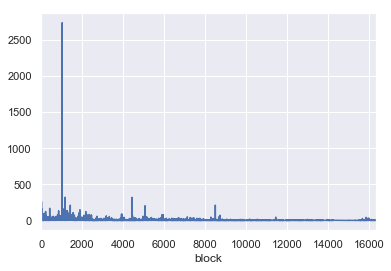

In [318]:
raw_data.groupby('block').size().plot()

# it reads as numerical, but infact categorical
# can be deleted

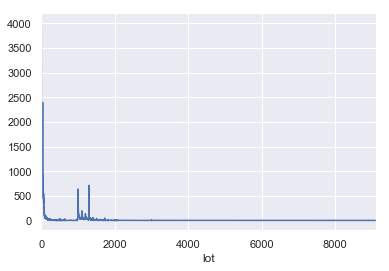

In [322]:
raw_data.groupby('lot').size().plot()

# it reads as numerical, but infact categorical
# can be deleted

In [203]:
raw_data.groupby('easement').size()

# can be deleted

easement
     85973
E        2
dtype: int64

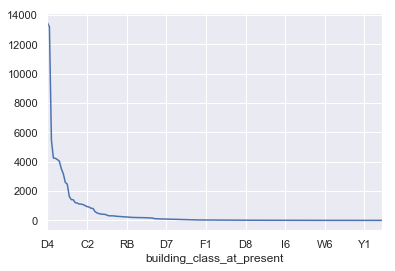

In [323]:
raw_data.groupby('building_class_at_present').size().sort_values(ascending=False).plot()

# raw_data[raw_data.building_class_at_present == 'C2'].groupby('building_class_at_present').size()

# some has +100 items? need domain knowledge to extract a meaningful sense
# building_class_at_present: may be mapped into 3 groups to use later ?
# no white-spaces at the end

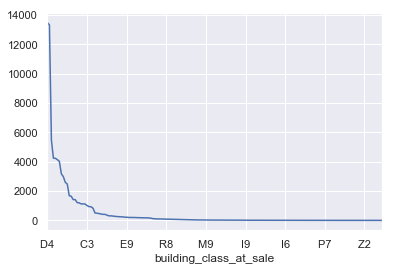

In [324]:
raw_data.groupby('building_class_at_sale').size().sort_values(ascending=False).plot()

In [325]:
raw_data.groupby('apartment_number').size().sort_values(ascending=False).head(10)

# len(raw_data.groupby('apartment_number').size()) 

# raw_data[raw_data.apartment_number == 'TIMES']

# 63830 is empty %74 empty
# 4000+ diff. apartment_number in 85K rows.
# apartment_number has ehite-spaces at the end

apartment_number
                63830
TIMES             599
4                 273
3B                249
3A                244
2                 235
3                 233
6                 228
2A                222
4A                219
dtype: int64

In [326]:
raw_data.groupby('zipcode').size().sort_values(ascending=False).head(10)#.plot(kind='pie')

# 10019 zipcode is %7 of houses
# 70K houses in 100 zipcodes

# no double rows

zipcode
10019    6193
10023    1514
11207    1357
11201    1314
10011    1261
11375    1200
10314    1164
10016    1147
10022    1119
11215    1106
dtype: int64

In [327]:
raw_data[['residential_units', 'commercial_units', 'total_units']].head(20)

# total = residental + commercial ?
# if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
# if total = 0 , what we should do?

,residential_units,commercial_units,total_units
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0
